In [1]:
from MMDtest import MMDtest
from rMMDtest import rMMDtest
from bMMDtest import bMMDtest
from lMMDtest import lMMDtest
from incMMDtest import incMMDtest
from matplotlib import pyplot as plt

from utils import gaussian_data_generator,gaussian_data_generator2
from utils import median_heuristic
from utils import result_viewer

import numpy as np
import jax
import jax.numpy as jnp
import itertools
from jax import vmap, random, jit
from tqdm.auto import tqdm
from functools import partial

In [2]:
repetitions = 2000

rMMDtest_2=partial(rMMDtest, R=200)
rMMDtest_3=partial(rMMDtest, R=1000)
incMMDtest_1=partial(incMMDtest, R=100)
incMMDtest_2=partial(incMMDtest, R=200)

tests = (MMDtest, rMMDtest_2, rMMDtest_3, incMMDtest_1, incMMDtest_2, lMMDtest, bMMDtest)

In [3]:
def HDgaussian_experiment(sample_sizes,params_interest,experiment_type):

    varying = sample_sizes if len(sample_sizes)>=2 else params_interest
    itertable = np.array([x for x in itertools.product(np.atleast_1d(sample_sizes),np.atleast_1d(params_interest))])
    sample_sizes = itertable[:,0]
    params_interest = itertable[:,1]
    
    outputs = jnp.zeros((len(tests), len(itertable), repetitions))
    outputs = outputs.tolist()
    key = random.PRNGKey(29)
    seed = 29
    for iter in tqdm(range(len(itertable))):    
        for rep in tqdm(range(repetitions)):
            if experiment_type == 'dimension':
                key, subkey = random.split(key)
                X = gaussian_data_generator2(key=key,
                                             size=sample_sizes[iter].astype(int),
                                             d=params_interest[iter].astype(int),
                                             epsilon=0,
                                             j=20)
                
                key, subkey = random.split(key)
                Y = gaussian_data_generator2(key=key,
                                             size=sample_sizes[iter].astype(int),
                                             d=params_interest[iter].astype(int),
                                             epsilon=0.1,
                                             j=20)
            elif experiment_type == 'var':
                key, subkey = random.split(key)
                X = gaussian_data_generator(key=key, 
                                            size=sample_sizes[iter].astype(int), 
                                            d=1000)
                
                key, subkey = random.split(key)
                Y = gaussian_data_generator(key=key, 
                                            size=sample_sizes[iter].astype(int), 
                                            Sigma=params_interest[iter], 
                                            d=1000)
    
            bw = median_heuristic(X, Y, "l2")
            
            key, subkey = random.split(key)
            seed += 1
            for t in range(len(tests)):
                
                outputs[t][iter][rep] = tests[t](
                    X,
                    Y,
                    subkey,
                    seed,
                    bandwidth = bw,
                    B = 199
                )
    
    power = jnp.mean(np.array(outputs), -1)
    return power, varying

### Varying dimension (Location difference)

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

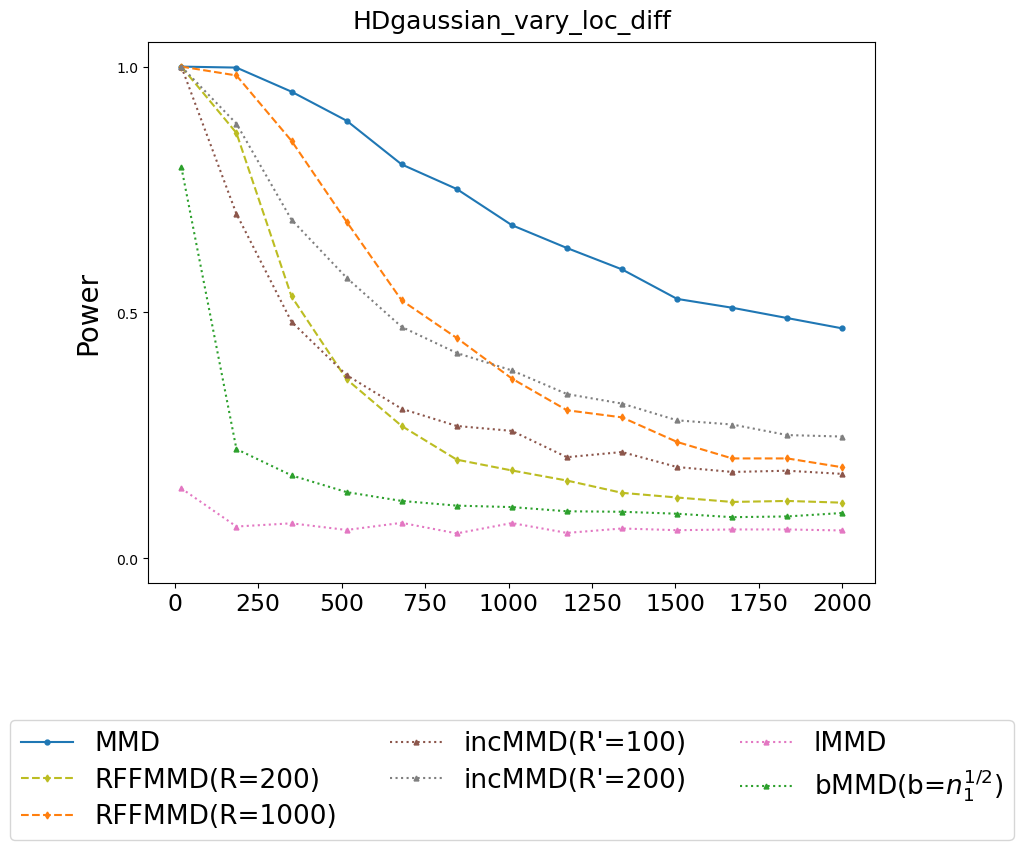

In [4]:
sample_sizes = np.array([1000])
params_interest = np.linspace(20,2000,13)
experiment_name = "HDgaussian_vary_loc_diff"

power,varying = HDgaussian_experiment(sample_sizes,params_interest,'dimension')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name, RFFMMD12=False)

### Varying sample size 

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

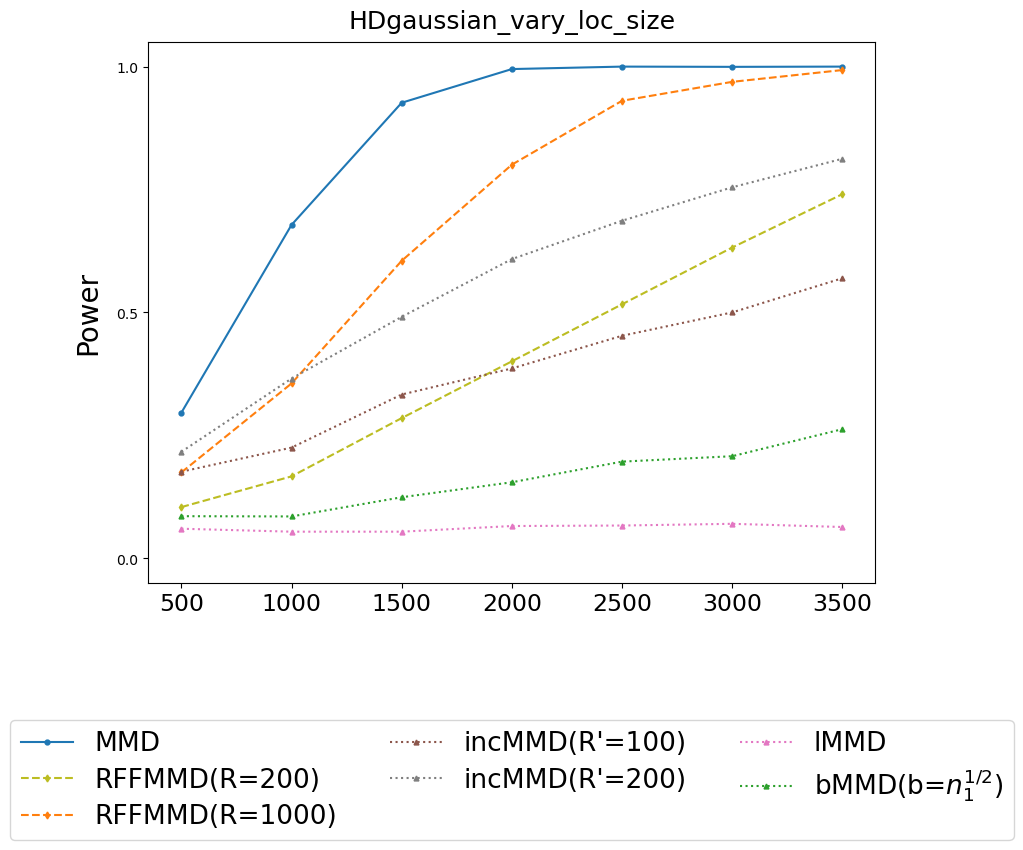

In [5]:
sample_sizes = np.arange(500,3501,500)
params_interest = np.array([1000])
experiment_name = "HDgaussian_vary_loc_size"

power,varying = HDgaussian_experiment(sample_sizes,params_interest,'dimension')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name, RFFMMD12=False)

### Varying variance

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

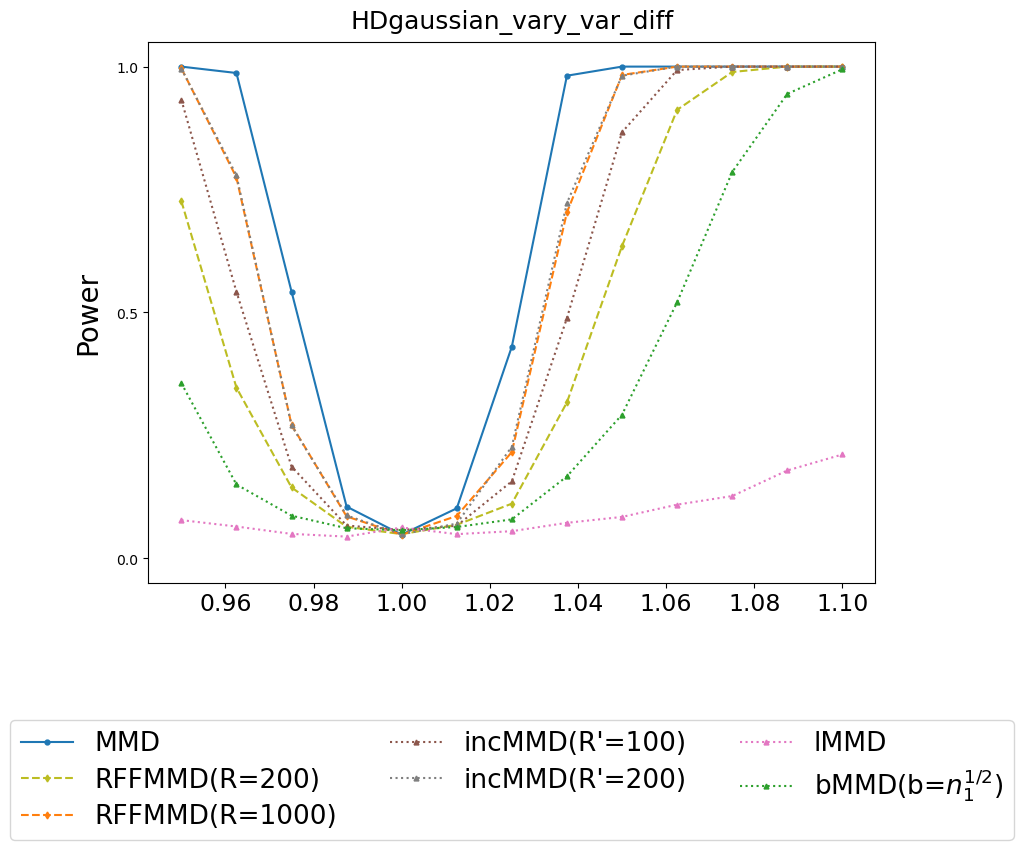

In [6]:
sample_sizes = np.array([1000])
params_interest = np.linspace(0.95,1.1,13)
experiment_name = "HDgaussian_vary_var_diff"

power,varying = HDgaussian_experiment(sample_sizes,params_interest,'var')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name, RFFMMD12=False)

### Varying sample size (variance)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

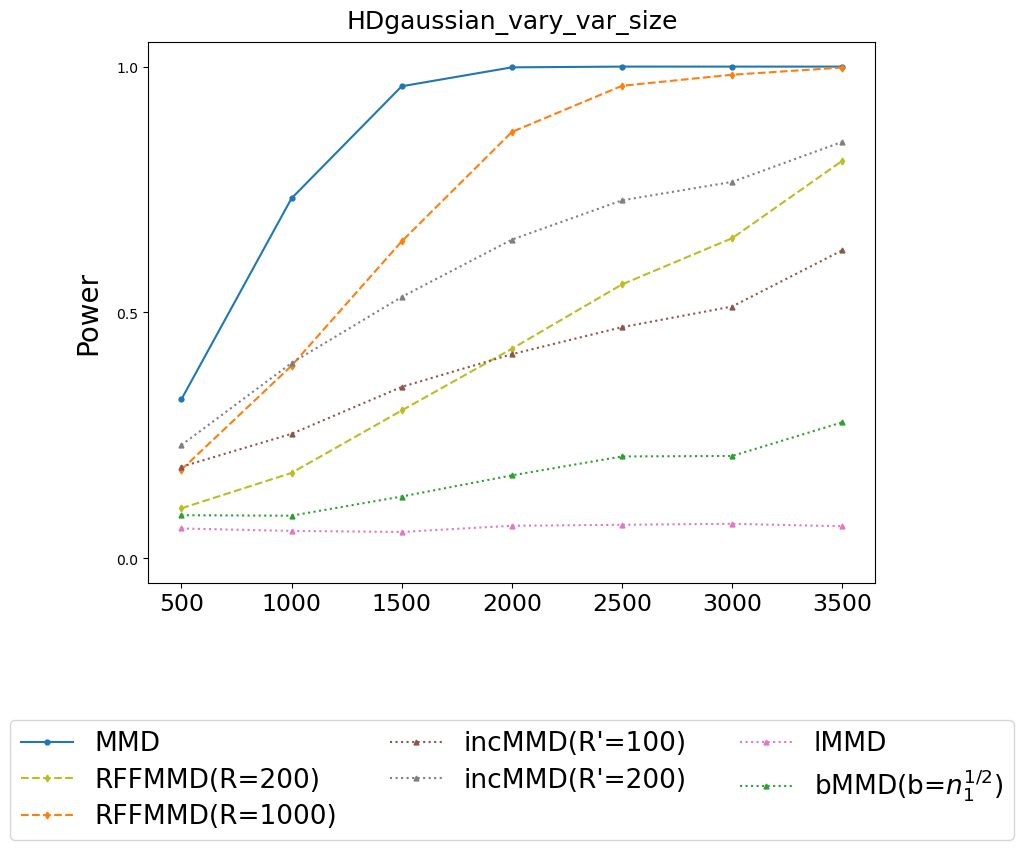

In [7]:
sample_sizes = np.arange(500,3501,500)
params_interest = np.array([1.03])
experiment_name = "HDgaussian_vary_var_size"

power,varying = HDgaussian_experiment(sample_sizes,params_interest,'var')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name, RFFMMD12=False)